# Factor Analysis

In [14]:
!pip install factor_analyzer

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 4.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 8.5 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42015 sha256=d937d2e5da6361a27ae83baff6dea3ed382d35ea517161ffa227066f75526722
  Stored in directory: /Users/jennatan/Library/Caches/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer
  DEPRECATION: Configur

Assumptions:

-There are no outliers in data.
-Sample size should be greater than the factor.
-There should not be perfect multicollinearity.
-There should not be homoscedasticity between the variables.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('/Users/jennatan/Downloads/train.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [35]:
df.drop(columns=['Unnamed: 0','id','Gender','Customer Type','Type of Travel', 'Class', 'satisfaction'], inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int64  
 1   Flight Distance                    103904 non-null  int64  
 2   Inflight wifi service              103904 non-null  int64  
 3   Departure/Arrival time convenient  103904 non-null  int64  
 4   Ease of Online booking             103904 non-null  int64  
 5   Gate location                      103904 non-null  int64  
 6   Food and drink                     103904 non-null  int64  
 7   Online boarding                    103904 non-null  int64  
 8   Seat comfort                       103904 non-null  int64  
 9   Inflight entertainment             103904 non-null  int64  
 10  On-board service                   103904 non-null  int64  
 11  Leg room service                   1039

In [37]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [38]:
df.dropna(inplace=True)

### Check adequacy

In [39]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_squared, p_value=calculate_bartlett_sphericity(df)
print(chi_squared,p_value)

898373.2660270258 0.0


In [40]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
kmo_model

0.7321057281420892

### Remove co-linearity

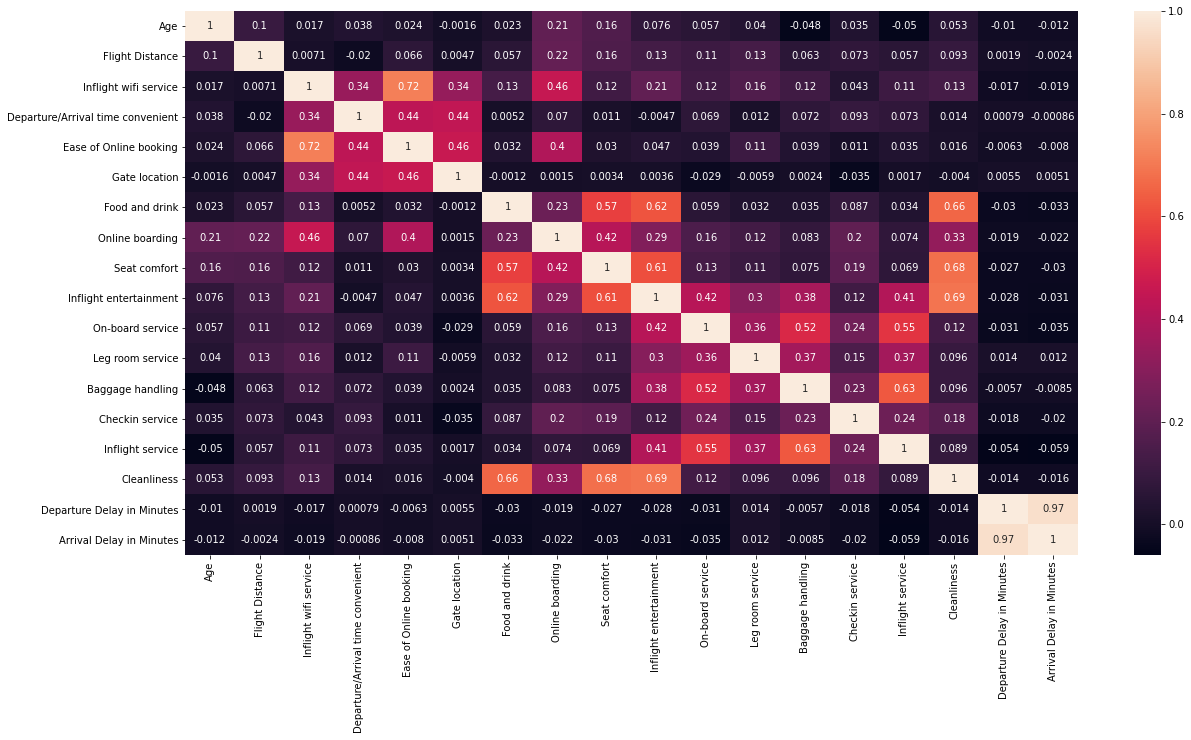

In [41]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c, annot=True);

In [42]:
df.drop(columns=['Arrival Delay in Minutes'],inplace=True)

### Scale

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
df_scaled = scaler.fit_transform(df)

In [45]:
df_scaled

array([[-1.7455419 , -0.73130527,  0.20352096, ...,  1.15621132,
         1.30591327,  0.26896611],
       [-0.95152625, -0.95691613,  0.20352096, ...,  0.30557993,
        -1.74243151, -0.36068159],
       [-0.88535828, -0.04745369, -0.54957057, ...,  0.30557993,
         1.30591327, -0.38691691],
       ...,
       [-0.6206864 ,  0.80786215, -1.30266211, ...,  1.15621132,
         0.54382707, -0.20326967],
       [-1.15003016, -0.18983921, -1.30266211, ...,  0.30557993,
        -1.74243151, -0.38691691],
       [-0.81919031,  0.53512369, -1.30266211, ..., -0.54505146,
        -1.74243151, -0.38691691]])

### Determine number of factors

In [113]:
from factor_analyzer.factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer()
fa.fit(df_scaled)

FactorAnalyzer(rotation_kwargs={})

In [114]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
print (ev, v)

[3.85645392 2.36269445 2.17873633 1.2452376  1.00854753 0.96110044
 0.92710648 0.89023208 0.68985831 0.53390034 0.47893853 0.44681807
 0.36666766 0.32321639 0.29463305 0.25070645 0.18515239] [ 3.47165059  1.96826477  1.83265226  0.50535314  0.26732888  0.13144335
  0.12709458  0.09199444  0.0717648   0.02040918 -0.00571596 -0.02612819
 -0.03914439 -0.10424381 -0.2077003  -0.21680574 -0.33053797]


Eigenvalues >1 mean that the factor explains variance for at least a single feature.

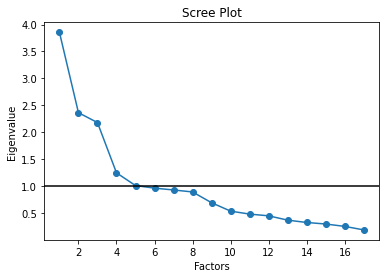

In [115]:
# Plot scree - use elbow method to identify optimum number of features
plt.scatter(range(1,df_scaled.shape[1]+1),ev)
plt.plot(range(1,df_scaled.shape[1]+1),ev) # plot draws the line
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, c='k')

### Drop low communalities

The communalities of the variables/features are inspected to see if the variables are well defined by the solution. Communalities indicate the percent of variance in a variable that overlaps variance in the factors. Ideally, we should drop variables with low communalities, for example, exclude those variables with <0.2 communalities. If the communality is low this suggests that the variable has little in common with the other variables and is likely a target for elimination.

In [128]:
communalities = pd.DataFrame(fa.get_communalities(), index=df.columns)
communalities[communalities[0]<0.2]

,0
Age,0.022949
Flight Distance,0.023417
Checkin service,0.083648
Departure Delay in Minutes,0.001127


In [132]:
# Drop low communalities
df.drop(columns=['Age','Flight Distance', 'Checkin service','Departure Delay in Minutes'], inplace=True)

In [133]:
df_scaled = scaler.fit_transform(df)

### Factor Analysis with 5 factors

In [148]:
fa = FactorAnalyzer(n_factors=5 )
fa.fit(df_scaled)

FactorAnalyzer(n_factors=5, rotation_kwargs={})

In [150]:
pd.DataFrame(fa.loadings_,index=df.columns)

,0,1,2,3,4
Inflight wifi service,0.023829,0.024875,0.743685,0.085535,0.050695
Departure/Arrival time convenient,0.003333,0.080930,-0.026600,0.042128,0.723853
Ease of Online booking,-0.092043,-0.064800,0.784558,0.070372,0.190320
Gate location,0.040208,-0.041525,0.171840,-0.110239,0.543491
Food and drink,0.816172,-0.129405,0.061930,-0.089959,-0.027157
Online boarding,0.053785,0.025120,0.187732,0.897825,-0.068932
Seat comfort,0.739123,-0.033487,-0.119328,0.195750,0.075092
Inflight entertainment,0.773240,0.356733,0.103625,-0.127151,-0.087210
On-board service,0.002768,0.707790,-0.066106,0.064624,0.038164
Leg room service,-0.002045,0.464118,0.149356,-0.013769,-0.101091


As a rule of thumb, only variables with loading of 0.32 and above are interpreted. The greater the loading, the more the vrialbe is a pure measure of the factor. Comrey and Lee (1992) suggest that loadings of:

->71% (50% overlapping variance) are considered excellent;  
->63% (40% overlapping variance) very good;  
->55% (30% overlapping variance) good;  
->45% (20% overlapping variance) fair;  
-<32% (10% overlapping variance) poor;

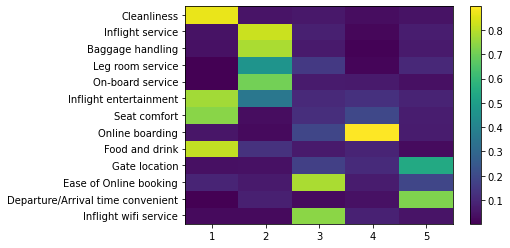

In [151]:
Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.columns.values)
ax.set_xticklabels(np.arange(1,6))
plt.show()

- Factor 1 has high loading for food and drink, cleanliness, seat comfort and inflight entertainment
- Factor 2 has high loading for inflight service, baggage handling, onboard service
- Factor 3 has high loading for inlight wifi service, ease of online booking, online boarding

In [112]:
pd.DataFrame(fa.get_factor_variance(), index=['SS Loadings','Proportion Var','Cum Var'])


,0,1,2,3,4
SS Loadings,2.684895,2.405679,1.496201,0.947065,0.873124
Proportion Var,0.157935,0.141511,0.088012,0.055710,0.051360
Cum Var,0.157935,0.299446,0.387457,0.443167,0.494527


- Five factors explain 49% of the variance

### Cronbach Alpha

Cronbach alpha can be used to measure whether or not the variables of a factor form a “coherent” and reliable factor. A value above 0.6 for the alpha is in practice deemed acceptable. Cronbach’s alpha is a measure of internal consistency, that is, how closely related a set of items are as a group.    It is considered to be a measure of scale reliability. 

In [145]:
!pip install pingouin
import pingouin as pg

#Create the factors
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Online boarding', 'Ease of Online booking', 'Gate location']]
#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.5/979.5 kB 6.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=514b2cef0c5c9bb06aa50ff021380975a12358170eda92b0dd6b84b46855ec0b
  Stored in directory: /Users/jennatan/Library/Caches/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at 

The alphas are evaluated at 0.87, 0.79 and 0.76, which indicates that they are useful and coherent. We could use these new factors as variable for other analysis or for prediction.

### Optimise model with rotation

To optimise the model we want high loadings for features that are distinct across factors. In our dataset the features are distinct from each other across factors already - we want to see if we can increase the loading values while still keeping Cronbach's alpha above 0.7

#### Rotation

Rotations simplify the interpretation of factor analysis by creating factors that are easier to understand and have a clearer relationship with the original variables. This is because the rotated factors have high factor loadings for a smaller set of variables, making it easier to identify the underlying structure in the data.  
  

Orthogonal rotations, such as the Varimax and Quartimax rotations, produce factors that are uncorrelated with each other. These rotations are useful when the factors are conceptually distinct and do not overlap. The Varimax rotation is the most commonly used orthogonal rotation in factor analysis.

Oblique rotations, such as the Promax and Oblimin rotations, produce factors that are correlated with each other. These rotations are useful when the factors are conceptually related and overlap. The Promax rotation is the most commonly used oblique rotation in factor analysis.

Rotations also help to improve the fit of the factor model by reducing the number of cross-loadings, or situations where a variable loads highly on more than one factor. Cross-loadings can make it difficult to interpret the factors and may result in an unstable factor solution.

In [154]:
fa2= FactorAnalyzer(n_factors=5,rotation='varimax')
fa2.fit(df_scaled)
pd.DataFrame(fa2.loadings_,index=df.columns)

,0,1,2,3,4
Inflight wifi service,0.111923,0.131437,0.697033,0.327321,0.204603
Departure/Arrival time convenient,-0.008464,0.056461,0.132285,0.698292,0.040833
Ease of Online booking,-0.018511,0.027640,0.747420,0.479608,0.183465
Gate location,0.003378,-0.031843,0.239245,0.598839,-0.073424
Food and drink,0.774197,-0.009454,0.065749,-0.006472,-0.004880
Online boarding,0.280713,0.088807,0.338152,-0.018862,0.890737
Seat comfort,0.754622,0.056020,-0.018115,0.019702,0.234303
Inflight entertainment,0.789348,0.472389,0.109158,-0.044350,-0.021389
On-board service,0.096848,0.693062,0.001189,0.016880,0.074948
Leg room service,0.069526,0.482456,0.137387,-0.038536,0.026079


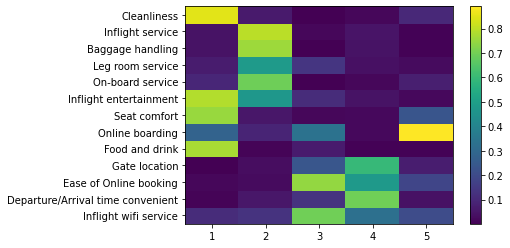

In [155]:
Z=np.abs(fa2.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.columns.values)
ax.set_xticklabels(np.arange(1,6))
plt.show()

In [158]:
fa3= FactorAnalyzer(n_factors=5,rotation='varimax', method='ml', use_smc=False)
fa3.fit(df_scaled)
pd.DataFrame(fa3.loadings_,index=df.columns)

,0,1,2,3,4
Inflight wifi service,0.101684,0.134563,0.496182,0.363611,0.530716
Departure/Arrival time convenient,-0.008958,0.057552,0.679487,0.036167,-0.043271
Ease of Online booking,-0.027782,0.030912,0.660180,0.350122,0.489729
Gate location,0.011175,-0.026168,0.663552,-0.059239,0.076166
Food and drink,0.775422,-0.005093,0.005926,0.009101,0.091632
Online boarding,0.276239,0.091609,0.062200,0.860367,0.136325
Seat comfort,0.758904,0.052278,0.012798,0.253819,-0.101753
Inflight entertainment,0.787867,0.472247,-0.020061,0.007543,0.136473
On-board service,0.100399,0.697058,0.003880,0.073335,-0.012191
Leg room service,0.069346,0.479557,0.005227,0.057218,0.126962


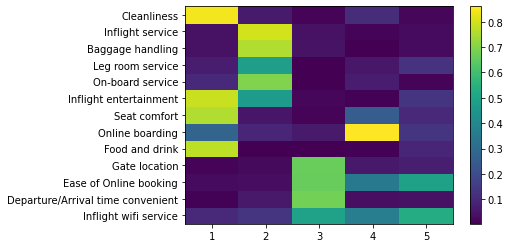

In [159]:
Z=np.abs(fa3.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.columns.values)
ax.set_xticklabels(np.arange(1,6))
plt.show()